Notebook to make a figure to evaluate the role of augmentation in classification

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.transforms as mtransforms

In [2]:
fsize = 15
tsize = 18
tdir = 'in'
major = 5.0
minor = 3.0
lwidth = 0.8
lhandle = 2.0
plt.style.use('default')
plt.rcParams['text.usetex'] = True
plt.rcParams['font.size'] = fsize
plt.rcParams['legend.fontsize'] = fsize-5
plt.rcParams['xtick.direction'] = tdir
plt.rcParams['ytick.direction'] = tdir
plt.rcParams['xtick.major.size'] = major
plt.rcParams['xtick.minor.size'] = minor
plt.rcParams['ytick.major.size'] = 5.0
plt.rcParams['ytick.minor.size'] = 3.0
plt.rcParams['axes.linewidth'] = lwidth
plt.rcParams['legend.handlelength'] = lhandle

In [3]:
import pandas as pd
import glob
import os
  
# merging the files
joined_files = "../../data/results/station*.csv"
joined_list = glob.glob(joined_files)
  
# Finally, the files are joined
df = pd.concat(map(pd.read_csv, joined_list), ignore_index=True)
print(df)

       Unnamed: 0            eq_name  record_number  magnitude mechanism  \
0               0      "Coalinga-01"            329       6.36   Reverse   
1               1      "Coalinga-01"            331       6.36   Reverse   
2               2      "Coalinga-05"            407       5.77   Reverse   
3               3      "Coalinga-01"            336       6.36   Reverse   
4               4      "Coalinga-01"            338       6.36   Reverse   
...           ...                ...            ...        ...       ...   
82735        7093   "Cape Mendocino"           3748       7.01   Reverse   
82736        7094   "Cape Mendocino"            828       7.01   Reverse   
82737        7095   "Cape Mendocino"           3745       7.01   Reverse   
82738        7096   "Cape Mendocino"           3748       7.01   Reverse   
82739        7097   "Cape Mendocino"           3748       7.01   Reverse   

        Rrup  noise_lev marker    color          label  threshold     snr_max  \
0     

/var/folders/8n/b02qxxyx4psb9_bb6sjg0jcw0000gp/T/ipykernel_94895/2176615533.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  tmp=tmp[df.noise_lev==noise]


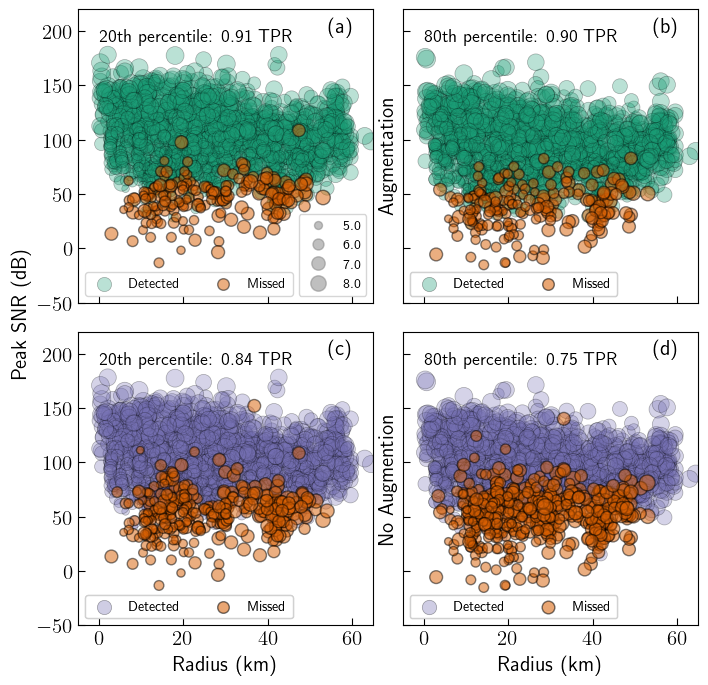

In [10]:
df=df[df.features=='psd_t']

colors=['#1b9e77','#7570b3','#d95f02']#['#e41a1c','#377eb8','#4daf4a']
fig,ax=plt.subplots(2,2, figsize=(8,8),sharex=True, sharey=True)
#power point
#fig,ax=plt.subplots(2,2, figsize=(12,8),sharex=True, sharey=True)

fig_lab=['a','b','c','d']
for i,(aug, color, title) in enumerate(zip([True,False],[colors[0],colors[1]],['Augmention','No Augmention'])):
    for j,noise in enumerate([20,80]):
        tmp=df[df.augment==aug]
        tmp=tmp[df.noise_lev==noise]
        #PLOT TP
        tp=tmp[(tmp['marker']=='o')]
        sizes=50*(tp['magnitude']-df['magnitude'].min())+30

        #fig,ax=plt.subplots(figsize=(7,4))
        #plt.grid(axis='y', color='grey', linestyle=':')
        scatter=ax[i,j].scatter(x=tp['Rrup'], y=tp['snr_max'], s=sizes, alpha=.3, color=color, ec='black', linewidth=.5,label=' Detected')

        fn=tmp[(tmp['marker']=='x')]
        sizes=50*(fn['magnitude']-df['magnitude'].min())+30
        ####
        scatter=ax[i,j].scatter(x=fn['Rrup'], y=fn['snr_max'], s=sizes, alpha=.5, color=colors[2], ec='black', label=' Missed')
        
        ax[i,j].set_ylim([-50,220])
        ax[i,j].set_xlim([-5,65])

        tpr=len(tp)/(len(tp)+len(fn))
        tpr="{:.2f}".format(tpr)
        legend1=ax[i,j].legend(loc='lower left', ncol=2) 
        ax[i,j].add_artist(legend1)
        
        trans = mtransforms.ScaledTranslation(10/72, -5/72, fig.dpi_scale_trans)
        ax[i,j].text(.8, 1.0, '(%s)' %fig_lab[int(2*i+j)], transform=ax[i,j].transAxes + trans,
            fontsize='medium', verticalalignment='top')

        ax[i,j].text(0,190,'%sth percentile: %s TPR' %(noise,tpr), fontsize=13)
        #ax[i,j].text(0,190,tpr, fontsize=12)
kw = dict(prop="sizes", num=4, color='grey', fmt=" {x:.1f}", \
          func=lambda s: (s-30)/30 + df['magnitude'].min())
legend2 = ax[0,0].legend(*scatter.legend_elements(**kw), \
                    loc="lower right") #, title="Magnitude"
        
fig.text(0.04, 0.5, 'Peak SNR (dB)', va='center', rotation='vertical')
ax[0,0].set_ylabel('Augmentation')
ax[0,0].yaxis.set_label_position("right")
ax[1,0].set_ylabel('No Augmention')
ax[1,0].yaxis.set_label_position("right")
ax[1,0].set_xlabel('Radius (km)')
ax[1,1].set_xlabel('Radius (km)')

#fig.tight_layout()
plt.subplots_adjust(wspace=.1, hspace=.1)

plt.savefig('figs/augmentation.png',dpi=300)
#plt.savefig('figs/augmentation_pp.png',dpi=200)

/var/folders/8n/b02qxxyx4psb9_bb6sjg0jcw0000gp/T/ipykernel_94895/528720625.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  tmp=tmp[df.noise_lev==noise]


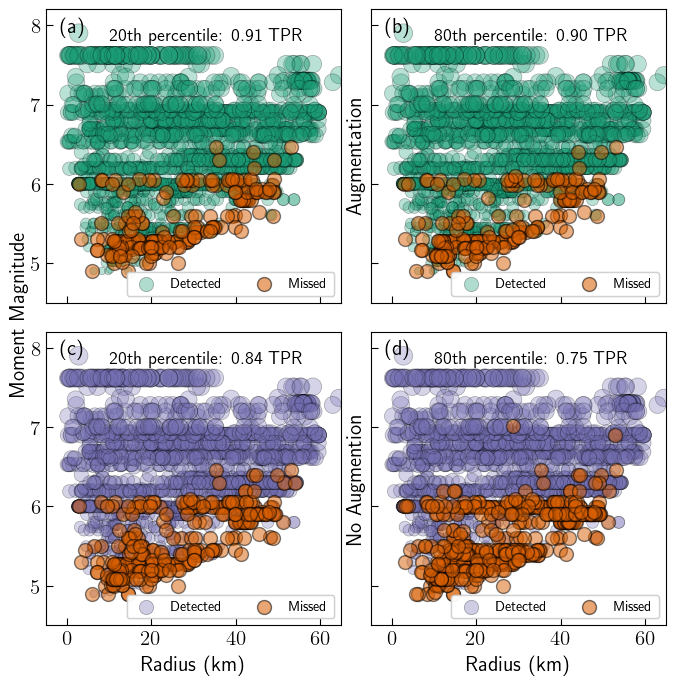

In [23]:
df=df[df.features=='psd_t']
#results_df=pd.DataFrame(results)
#results_df=results_df[results_df[5]=='5']

colors=['#1b9e77','#7570b3','#d95f02']#['#e41a1c','#377eb8','#4daf4a']
#colors.reverse()
fig,ax=plt.subplots(2,2, figsize=(8,8),sharex=True, sharey=True)
#power point
#fig,ax=plt.subplots(2,2, figsize=(12,8),sharex=True, sharey=True)

fig_lab=['a','b','c','d']
for i,(aug, color, title) in enumerate(zip([True,False],[colors[0],colors[1]],['Augmention','No Augmention'])):
    for j,noise in enumerate([20,80]):
        tmp=df[df.augment==aug]
        tmp=tmp[df.noise_lev==noise]
        #PLOT TP
        tp=tmp[(tmp['marker']=='o')]
        sizes=50*(tp['magnitude']-df['magnitude'].min())+30



        #fig,ax=plt.subplots(figsize=(7,4))
        #plt.grid(axis='y', color='grey', linestyle=':')
        scatter=ax[i,j].scatter(x=tp['Rrup'], y=tp['magnitude'], s=sizes, alpha=.3, color=color, ec='black', linewidth=.5,label=' Detected')

        fn=tmp[(tmp['marker']=='x')]
        sizes=50*(fn['magnitude']-df['magnitude'].min())+30
        ####
        #sizes=150*(tmp[2]-tmp[2].min())+30
        scatter=ax[i,j].scatter(x=fn['Rrup'], y=fn['magnitude'], s=100, alpha=.5, color=colors[2], ec='black', label=' Missed')
        #ax.scatter(x=tmp[4], y=tmp[9], s=5, color='#d95f02', label='P wave')
        #ax.scatter(x=tmp[4], y=tmp[9], s=5, color='#1b9e77', label='S wave')
        #ax[i,j].set_xlabel('Rrup (km)')
        #ax[i,j].set_ylabel('Peak SNR (dB)')
        
        ax[i,j].set_ylim([4.5,8.2])
        ax[i,j].set_xlim([-5,65])

        tpr=len(tp)/(len(tp)+len(fn))
        tpr="{:.2f}".format(tpr)
        legend1=ax[i,j].legend(loc='lower right', ncol=2) 
        ax[i,j].add_artist(legend1)
        
        trans = mtransforms.ScaledTranslation(10/72, -5/72, fig.dpi_scale_trans)
        ax[i,j].text(0, 1.0, '(%s)' %fig_lab[int(2*i+j)], transform=ax[i,j].transAxes + trans,
            fontsize='medium', verticalalignment='top')
        
        
        # Produce a legend for the ranking (colors). Even though there are 40 different
        # rankings, we only want to show 5 of them in the legend.
        #legend1 = ax.legend(*scatter.legend_elements(num=3),
        #                   loc="upper left")
        #ax.add_artist(legend1)

        # Produce a legend for the price (sizes). Because we want to show the prices
        # in dollars, we use the *func* argument to supply the inverse of the function
        # used to calculate the sizes from above. The *fmt* ensures to show the price
        # in dollars. Note how we target at 5 elements here, but obtain only 4 in the
        # created legend due to the automatic round prices that are chosen for us.
        ax[i,j].text(10,7.8,'%sth percentile: %s TPR' %(noise,tpr), fontsize=13)
        #ax[i,j].text(0,190,tpr, fontsize=12)
kw = dict(prop="sizes", num=4, color='grey', fmt=" {x:.1f}", \
          func=lambda s: (s-30)/30 + df['magnitude'].min())
#legend2 = ax[0,0].legend(*scatter.legend_elements(**kw), \
#                    loc="lower right") #, title="Magnitude"
        
        

#plt.savefig('time_of_detect3.png', dpi=500)
#fig.text(0.5, 0.04, 'Radius (km)', ha='center')
fig.text(0.08, 0.5, 'Moment Magnitude', va='center', rotation='vertical')
ax[0,0].set_ylabel('Augmentation')
ax[0,0].yaxis.set_label_position("right")
ax[1,0].set_ylabel('No Augmention')
ax[1,0].yaxis.set_label_position("right")
ax[1,0].set_xlabel('Radius (km)')
ax[1,1].set_xlabel('Radius (km)')



#fig.tight_layout()
plt.subplots_adjust(wspace=.1, hspace=.1)

#plt.show()
plt.savefig('figs/augmentation_mag.png',dpi=300)

# make a PP figure

In [ ]:
fsize = 20
tsize = 20
tdir = 'in'
major = 5.0
minor = 3.0
lwidth = 0.8
lhandle = 2.0
plt.style.use('default')
plt.rcParams['text.usetex'] = False
plt.rcParams['font.size'] = fsize
plt.rcParams['legend.fontsize'] = fsize-8
plt.rcParams['xtick.direction'] = tdir
plt.rcParams['ytick.direction'] = tdir
plt.rcParams['xtick.major.size'] = major
plt.rcParams['xtick.minor.size'] = minor
plt.rcParams['ytick.major.size'] = 5.0
plt.rcParams['ytick.minor.size'] = 3.0
plt.rcParams['axes.linewidth'] = lwidth
plt.rcParams['legend.handlelength'] = lhandle